In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("NVDA.csv")
print(df.head())
print(df.info())
summary_statistics = df.describe()
summary_statistics

         Date        Open        High         Low       Close   Adj Close  \
0  2022-09-20  132.149994  134.830002  130.570007  131.759995  131.679443   
1  2022-09-21  132.130005  140.309998  131.100006  132.610001  132.528931   
2  2022-09-22  130.699997  131.490005  124.279999  125.610001  125.533211   
3  2022-09-23  124.199997  126.110001  122.570000  125.160004  125.083488   
4  2022-09-26  124.910004  126.589996  122.139999  122.279999  122.205246   

     Volume  Close_Diff  Volume_Diff  
0  52481800         NaN          NaN  
1  80767900    0.850006   28286100.0  
2  75916200   -7.000000   -4851700.0  
3  66330900   -0.449997   -9585300.0  
4  54734300   -2.880005  -11596600.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         251 non-null    object 
 1   Open         251 non-null    float64
 2   High         251 non-null 

,Open,High,Low,Close,Adj Close,Volume,Close_Diff,Volume_Diff
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,250.000000,2.500000e+02
mean,275.280558,280.517330,270.367449,275.771992,275.715620,5.015417e+07,1.213760,-6.091960e+04
std,122.947867,124.308434,120.647273,122.302028,122.318306,1.642223e+07,9.329557,1.654678e+07
min,109.709999,117.349998,108.129997,112.269997,112.201363,1.679340e+07,-22.769989,-8.295140e+07
25%,161.069999,165.334999,158.625000,162.824997,162.725471,3.889485e+07,-3.802497,-8.475800e+06
50%,261.799988,263.989990,256.679993,261.989990,261.941315,4.748660e+07,0.525001,-6.593000e+05
75%,411.909988,420.985001,405.349991,414.965012,414.930832,5.654680e+07,5.312511,6.932600e+06
max,502.160004,502.660004,489.579987,493.549988,493.509338,1.543911e+08,74.419983,8.224920e+07


Basic Feature Engineering

In [41]:
df['Close_Diff'] = df['Close'].diff()
df['Volume_Diff'] = df['Volume'].diff()
df['Spread'] = df['High'] - df['Low']
df['Candle'] = df['Close'] - df['Open']

Plotting Movements over Time

- to do: see if there are any notable financial news happenings that coincide with big movements
- is the vol
- RSI

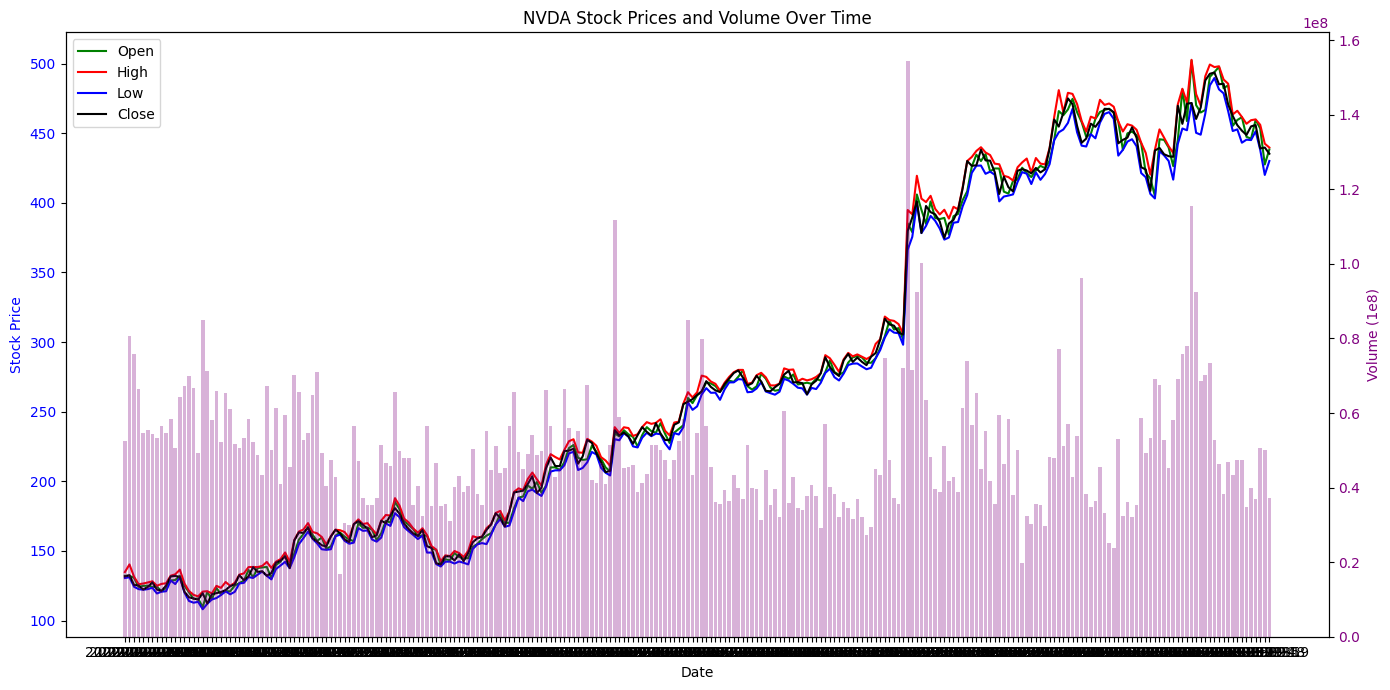

In [13]:
fig, ax1 = plt.subplots(figsize=(14, 7))
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='blue')
ax1.plot(df['Date'], df['Open'], label='Open', color='green')
ax1.plot(df['Date'], df['High'], label='High', color='red')
ax1.plot(df['Date'], df['Low'], label='Low', color='blue')
ax1.plot(df['Date'], df['Close'], label='Close', color='black')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend()
ax2 = ax1.twinx()
ax2.set_ylabel('Volume (1e8)', color='purple')
ax2.bar(df['Date'], df['Volume'], color='purple', alpha=0.3)
ax2.tick_params(axis='y', labelcolor='purple')
plt.xticks(rotation=45)
plt.title('NVDA Stock Prices and Volume Over Time')
plt.tight_layout()
plt.show()

Plotting Diff

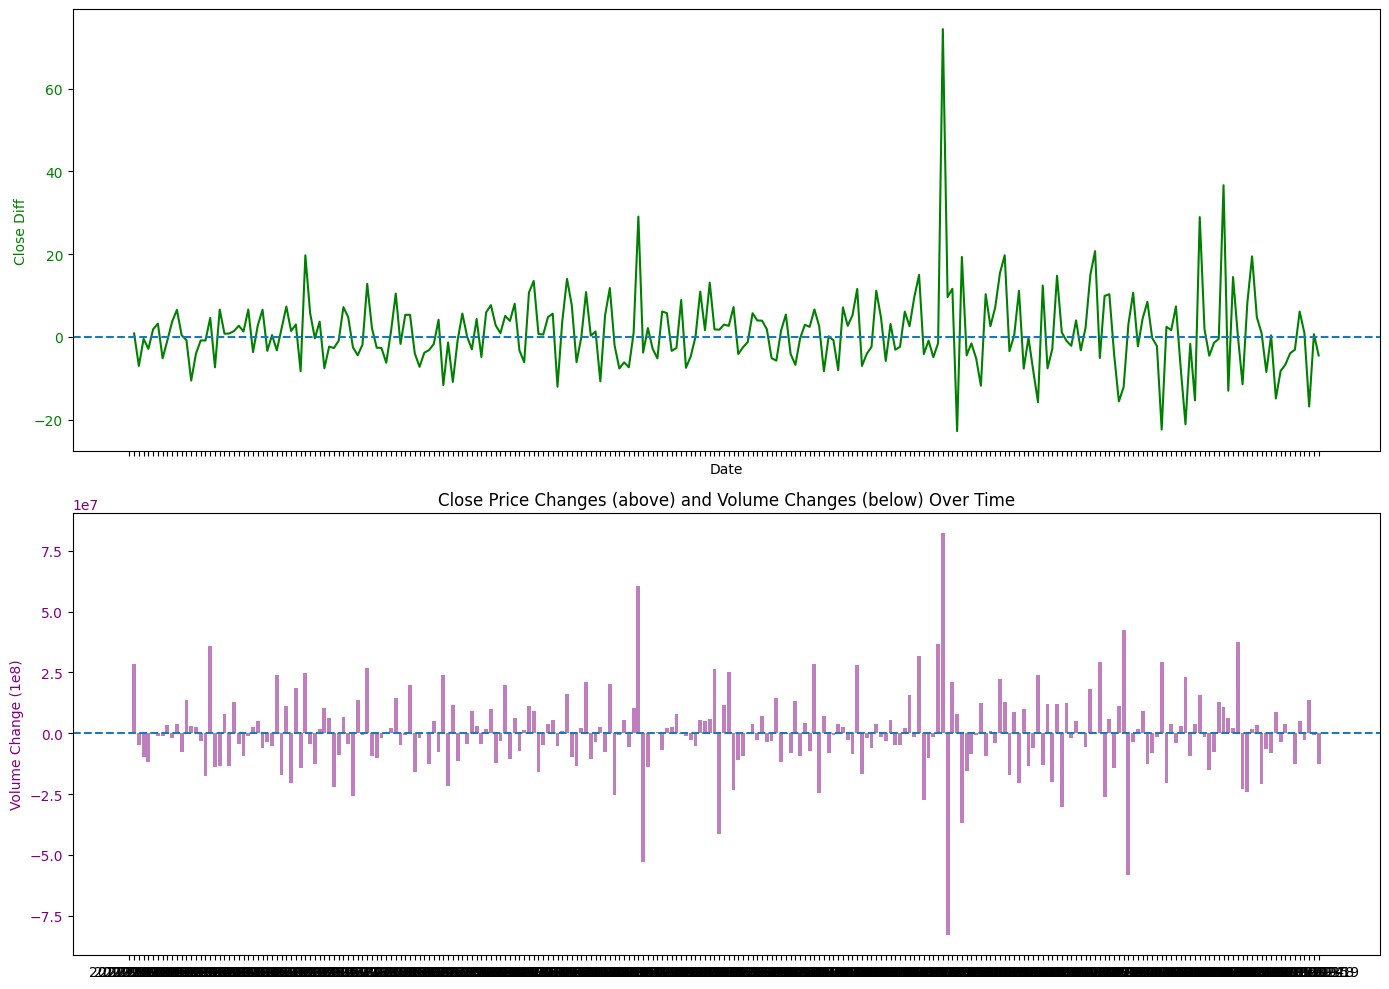

In [38]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
plt.title('Close Price Changes (above) and Volume Changes (below) Over Time')

ax1.set_xlabel('Date')
ax1.set_ylabel('Close Diff', color='green')
ax1.plot(df['Date'], df['Close_Diff'], label='Open', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.axhline(0, linestyle = 'dashed')
ax2.set_ylabel('Volume Change (1e8)', color='purple')
ax2.bar(df['Date'], df['Volume_Diff'], color='purple', alpha=0.5)
ax2.tick_params(axis='y', labelcolor='purple')
ax2.axhline(0, linestyle = 'dashed')
plt.tight_layout()
plt.show()